In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('hf.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

203
96


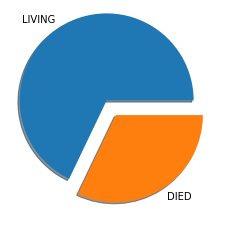

In [8]:
len_live=len(data["DEATH_EVENT"][data.DEATH_EVENT==0])
len_death=len(data["DEATH_EVENT"][data.DEATH_EVENT==1])
arr=np.array([len_live,len_death])
labels=['LIVING','DIED']
print(len_live)
print(len_death)
plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

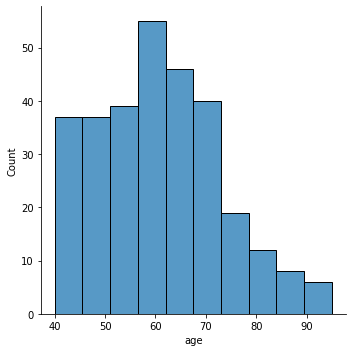

In [9]:
sns.displot(data['age'])
plt.show()

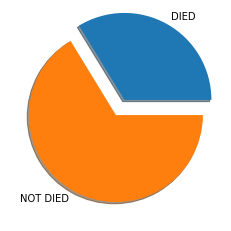

In [10]:
age_above_50_not_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==0]
age_above_50_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==1]
len_died=len(age_above_50_died)
len_not_died=len(age_above_50_not_died)
arr1=[len_died,len_not_died]
labels=['DIED','NOT DIED']
plt.pie(arr1,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()


In [11]:
print("Total no of died cases",len_died)
print("Total no of not died cases",len_not_died)

Total no of died cases 85
Total no of not died cases 167


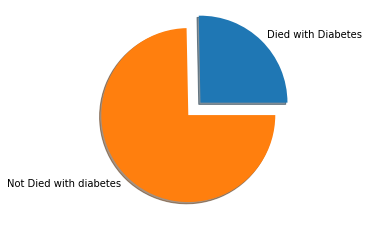

In [12]:
patient_have_diabetes_0=data['DEATH_EVENT'][data.diabetes==0][data.DEATH_EVENT==0]
patient_have_diabetes_1=data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==1]
len_d_died=len(patient_have_diabetes_1)
len_d_alive=len(patient_have_diabetes_0)
arr2=[len_d_died,len_d_alive]
labels=['Died with Diabetes','Not Died with diabetes']
plt.pie(arr2,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

<AxesSubplot:>

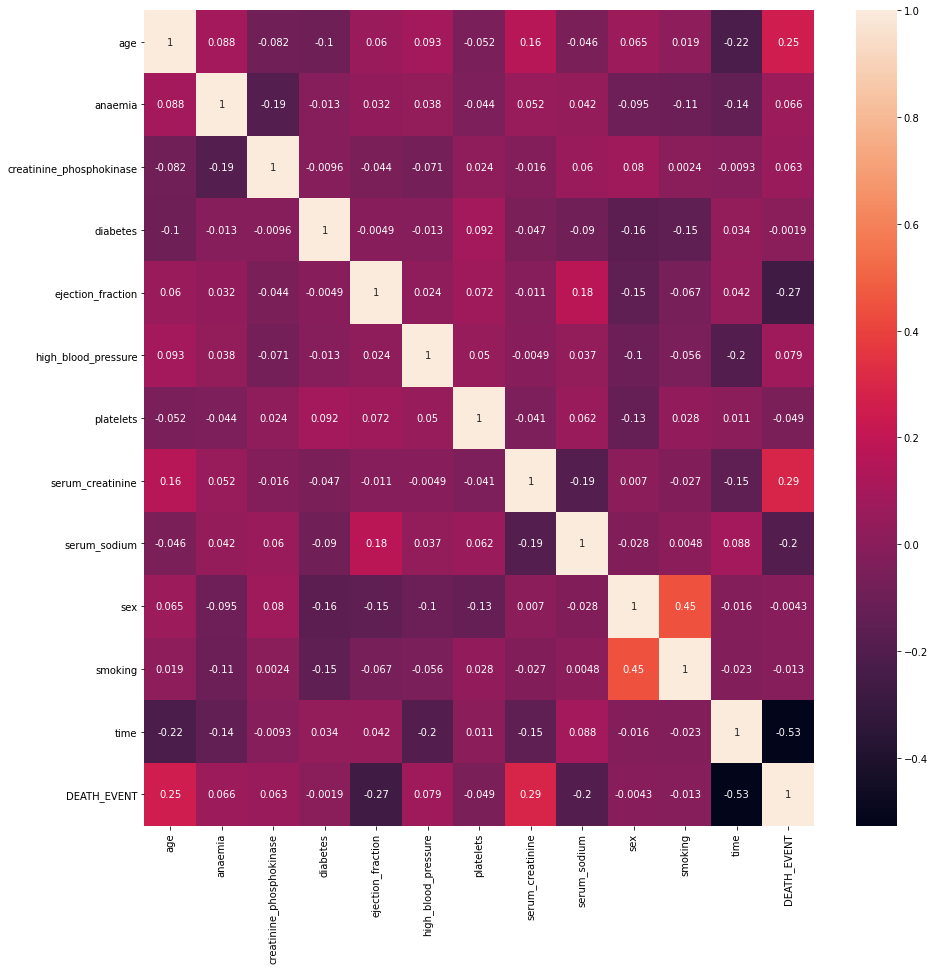

In [13]:
corr=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [14]:
data.corr().style.background_gradient(cmap='coolwarm')


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [15]:
from sklearn.model_selection import train_test_split
X=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(90,)

In [16]:
def add_interactions(X):
    features=X.columns
    m=len(features)
    X_int=X.copy(deep=True)
    for i in range(m):
        feature_i_name=features[i]
        feature_i_data=X[feature_i_name]
        for j in range(i+1,m):
            feature_j_name=features[j]
            feature_j_data=X[feature_j_name]
            feature_i_j_name=feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name]=feature_i_data+feature_j_data
    return X_int
x_train_mod=add_interactions(X_train)
x_test_mod=add_interactions(X_test)


In [17]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,138.7,3.7,3.7,252.7,137,137,386,2,251,251
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,143.1,1.1,1.1,34.1,142,142,175,0,33,33
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,137.3,2.3,2.3,213.3,137,137,348,2,213,213
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,140.9,0.9,0.9,174.9,140,140,314,0,174,174
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,134.9,1.9,1.9,118.9,135,135,252,2,119,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,143.8,0.8,0.8,215.8,143,143,358,0,215,215
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,130.7,1.7,0.7,175.7,131,130,305,1,176,175
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,141.2,3.2,3.2,97.2,138,138,232,0,94,94
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,138.6,1.6,1.6,40.6,139,139,178,2,41,41


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
def evaluating_model(y_test,y_pred):
    print(accuracy_score(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [19]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(max_iter=100)
lr_clf.fit(X_train,y_train)
lr_clf_pred=lr_clf.predict(X_test)


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_pred=lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)


0.7888888888888889
0.7647058823529411
0.4642857142857143
[[58  4]
 [15 13]]


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

0.8111111111111111
0.7894736842105263
0.5357142857142857
[[58  4]
 [13 15]]


In [22]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_estimator_


SVC(C=10, gamma=0.0001)

In [24]:
svc = SVC(C = 10, gamma = 0.0001) 
svc.fit(X_train, y_train) 
y_pred2 = svc.predict(X_test) 
evaluating_model(y_test, y_pred2)


0.6777777777777778
0.4
0.07142857142857142
[[59  3]
 [26  2]]


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.847
Test score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [26]:
ds_clf = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)


0.8111111111111111
0.72
0.6428571428571429
[[55  7]
 [10 18]]


In [27]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [28]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

0.8666666666666667
0.9
0.6428571428571429
[[60  2]
 [10 18]]


In [30]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
learning_rate = 0.1,
max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53183
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48129
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38522
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validation_0-logloss:0.36676
[18]	validation_0-logloss:0.36467
[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.34448
[29]	validation_0-logloss:0.34190
[30]	validation_0-logloss:0.34213
[31]	validation_0-logloss:0.34117
[32]	validation_0-logloss:0.33854
[33]	validation_0-logloss:0.33701
[34]	validation_0-logloss:0.33778
[35]	validation_0-logloss:0.33757
[36]	validation_0-logloss:0.33578
[37]	validation_0-logloss:0.33511
[38]	validation_0-logloss:0.33418
[39]	validation_0-logloss:0.33277
[40]	validation_0-logloss:0.33211
[41]	validation_0-logloss:0.32965
[42]	validation_0-logloss:0.32868
[43]	validation_0-logloss:0.32739
[44]	validation_0-logloss:0.32850
[45]	validation_0-logloss:0.32887
[46]	validation_0-logloss:0.33055
[47]	validation_0-logloss:0.32993
[48]	validation_0-logloss:0.33082
[49]	validation_0-logloss:0.32964
[50]	validation_0-logloss:0.32906
[51]	validation_0-logloss:0.32838
[52]	validation_0-logloss:0.32767


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
pred6 = xgb1.predict(X_test) 
evaluating_model(y_test, pred6)

0.8555555555555555
0.8
0.7142857142857143
[[57  5]
 [ 8 20]]


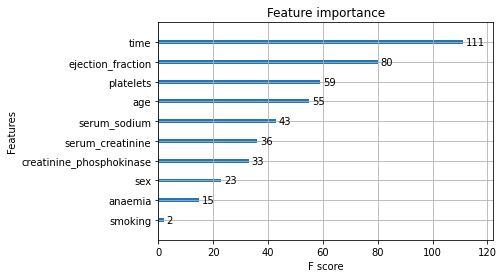

In [32]:
from xgboost import plot_importance

plot_importance(xgb1)
plt.show()

In [33]:

from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(X_train, y_train) 

pred_gdbt = gbdt.predict(X_test) 
evaluating_model(y_test, pred_gdbt)

0.8555555555555555
0.8571428571428571
0.6428571428571429
[[59  3]
 [10 18]]


In [34]:
import joblib 
joblib.dump(xgb1, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)